In [1]:
# info here https://research.fb.com/prophet-forecasting-at-scale/
# https://facebookincubator.github.io/prophet/docs/quick_start.html

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
future_periods = 730

# regular usage

In [4]:
df = pd.read_csv('order_counts.csv',header=0,names=['ds','y'])
# df = pd.read_csv('ticket_counts.csv',header=0,names=['ds','y'])
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2015-01-01,12.345104
1,2015-01-02,12.035041
2,2015-01-03,12.206368
3,2015-01-04,12.185594
4,2015-01-05,11.942237


In [5]:
# m = Prophet(holidays=holidays)
m = Prophet()
m.fit(df)

In [6]:
future = m.make_future_dataframe(periods=future_periods)
future.tail()

,ds
1517,2019-02-26
1518,2019-02-27
1519,2019-02-28
1520,2019-03-01
1521,2019-03-02


In [7]:
forecast = m.predict(future)

In [8]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1517,2019-02-26,12.784589,12.546645,13.021720
1518,2019-02-27,12.802873,12.577124,13.025919
1519,2019-02-28,12.815939,12.573826,13.042020
1520,2019-03-01,12.938166,12.705476,13.165399
1521,2019-03-02,12.919421,12.684196,13.155491


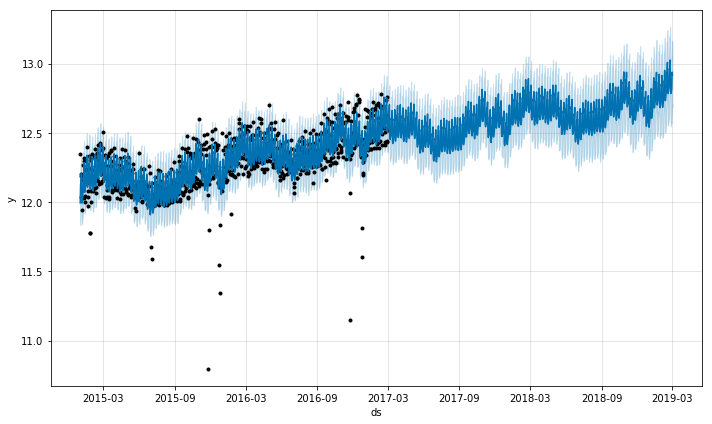

In [9]:
m.plot(forecast)

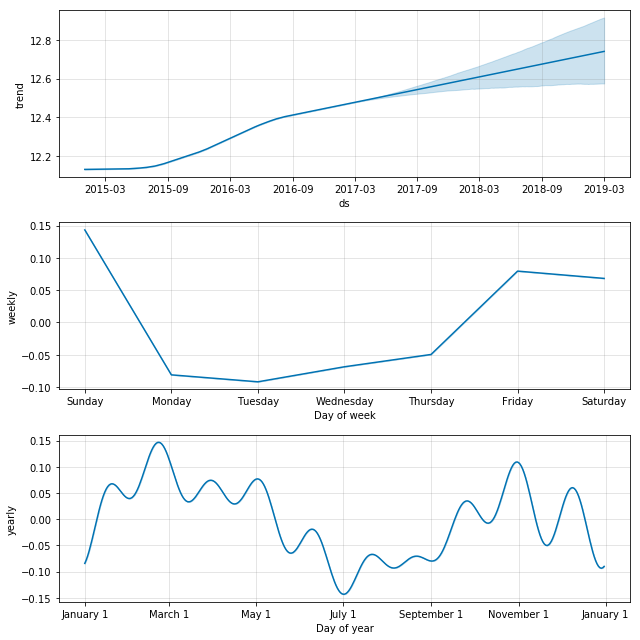

In [10]:
m.plot_components(forecast)

# let's try it with holidays

In [11]:
holidays = pd.read_csv('holidays.csv',sep='|',header=0)
holidays.head()

,ds,holiday,upper_window,lower_window
0,2009-01-01,holiday,0,0
1,2009-01-19,holiday,0,0
2,2009-01-20,holiday,0,0
3,2009-02-01,holiday,0,0
4,2009-02-12,holiday,0,0


In [12]:
df2 = pd.read_csv('sales_total.csv',header=0,names=['ds','y'])
df2['y'] = np.log(df2['y'])

In [13]:
m2 = Prophet(holidays=holidays)
m2.fit(df2)

In [14]:
future2 = m2.make_future_dataframe(periods=future_periods)

In [15]:
forecast2 = m2.predict(future2)

In [16]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1517,2019-02-26,16.245578,16.039226,16.475612
1518,2019-02-27,16.266542,16.036795,16.480133
1519,2019-02-28,16.286831,16.065300,16.508118
1520,2019-03-01,16.463366,16.229909,16.682625
1521,2019-03-02,16.441337,16.224224,16.664135


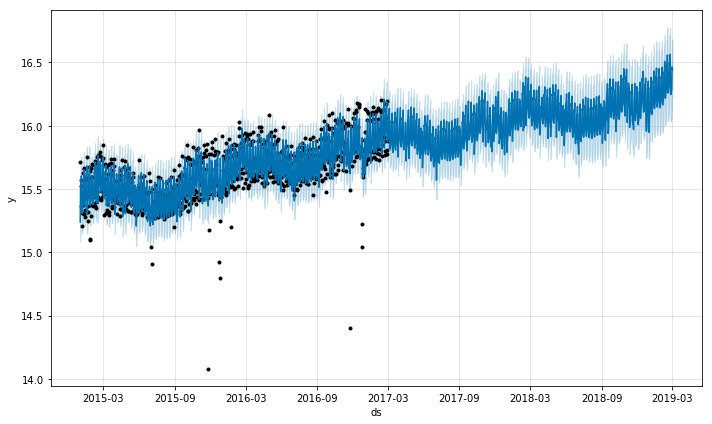

In [17]:
m2.plot(forecast2)

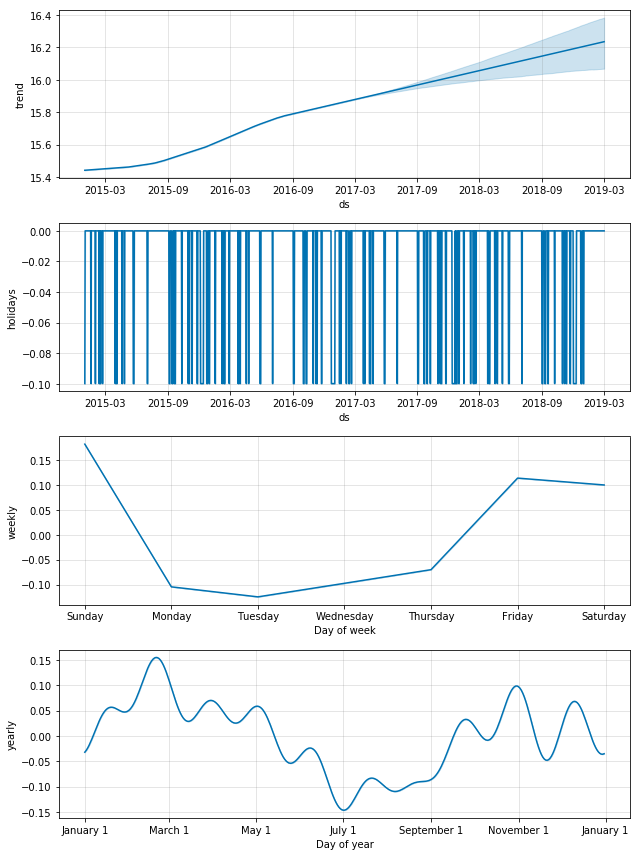

In [18]:
m2.plot_components(forecast2)

# add a cap and do logistic

In [19]:
df3 = pd.read_csv('resto_count.csv',header=0,names=['ds','y'])
df3 = df3[df3['ds'] >= '2011-01-01']
print max(df3['y'])
df3['y'] = np.log(df3['y'])
print max(df3['y'])
# df3['cap'] = 12

49097
10.8015532121


In [20]:
m3 = Prophet(growth='logistic')
m3 = Prophet()
m3.fit(df3)

In [ ]:
future3 = m3.make_future_dataframe(periods=future_periods)
# future3['cap'] = 12

In [ ]:
forecast3 = m3.predict(future3)

In [ ]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
forecast3_nolog = forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast3_nolog['yhat'] = np.e**forecast3_nolog['yhat']
forecast3_nolog['yhat_lower'] = np.e**forecast3_nolog['yhat_lower']
forecast3_nolog['yhat_upper'] = np.e**forecast3_nolog['yhat_upper']
m3.plot(forecast3_nolog)

In [ ]:
m3.plot(forecast3)

In [ ]:
m3.plot_components(forecast3)

# hourly data works right?

In [ ]:
# df4 = pd.read_csv('hourly_orders.csv',header=0,names=['ds','y'])
df4 = pd.read_csv('hourly_tickets.csv',header=0,names=['ds','y'])
print max(df4['y'])
df4['y'] = np.log(df4['y'])
print max(df4['y'])
cap4 = 10
df4['cap'] = cap4

In [ ]:
m4 = Prophet(growth='logistic')
m4.fit(df4)

In [ ]:
future4 = m4.make_future_dataframe(periods=(24*14), freq='H')
future4['cap'] = cap4

In [ ]:
forecast4 = m4.predict(future4)

In [ ]:
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
m4.plot(forecast4)

In [ ]:
m4.plot_components(forecast4)